# Feature Selection with sklearn and Pandas

Feature selection is one of the first and important steps while performing any machine learning task. A feature in case of a dataset simply means a column. When we get any dataset, not necessarily every column (feature) is going to have an impact on the output variable. If we add these irrelevant features in the model, it will just make the model worst (Garbage In Garbage Out). This gives rise to the need of doing feature selection.

Feature selection can be done in multiple ways but there are broadly 3 categories of it:
1. Filter Method 
2. Wrapper Method 
3. Embedded Method

In [1]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [2]:
#Loading the dataset
x = load_boston()
x.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [3]:
x.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
x.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [5]:
df=pd.DataFrame(x.data, columns=x.feature_names)
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
df["MEDV"]=x.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
df.shape

(506, 14)

In [8]:
x = df.drop("MEDV",1)   #Feature Matrix
y = df["MEDV"]          #Target Variable

# Linear Regression model with all features

In [9]:
#Spliting the dataset into a training set and a testing set

from sklearn.cross_validation import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)


C:\Users\MOHAN KUMAR SAH\.conda\envs\python3.5\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
# Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. 

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

In [11]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
y_pred

array([37.56069218, 32.14555633, 27.06833378,  5.66610661, 35.09698333,
        5.83099151, 27.53756711, 31.809628  , 26.3580762 , 22.77119259,
       31.91186024, 21.50095135, 23.70639369, 33.35648485, 28.51915286,
       14.39181198,  0.1535427 , 18.65763854, 13.70732368, 14.12021541,
        2.02605847, 19.72955829, 38.18124463, 24.19876798, 31.30039855,
       11.11721913, 25.03882092, 23.28256933, 22.49148959, 20.52547734,
       15.16124809,  6.92457595, 18.35860857, 22.35816369, 28.91372665,
       19.03232417, 30.19611763,  8.69560779, 40.85710342, 34.53711266,
       20.70151817,  2.59035572, 29.99988244, 12.10464815, 27.11069816,
       30.80761691, -6.26665879, 19.85085368, 20.92314069, 12.42784947,
       20.49429415, 19.19061463, 23.69678829, 12.65653174, 17.12436909,
       25.04711172, 34.77503167, 15.18254259, 28.23119245, 21.08913078,
       20.39429355, 25.79773782, 14.7265223 , 33.1939473 , 23.17552527,
       13.12006695, 19.22713686, 24.61430325, 21.50693019, 22.00

In [12]:
print("Accuracy of the model is {:.2f} %" .format(model.score(x_test,y_test)*100))

Accuracy of the model is 73.30 %


# Feature Selection

It is a technique which select the most relevant features from the original dataset

# 1. Filter Method

As the name suggest, in this method, you filter and take only the subset of the relevant features. The model is built after selecting the features. The filtering here is done using correlation matrix and it is most commonly done using Pearson correlation.

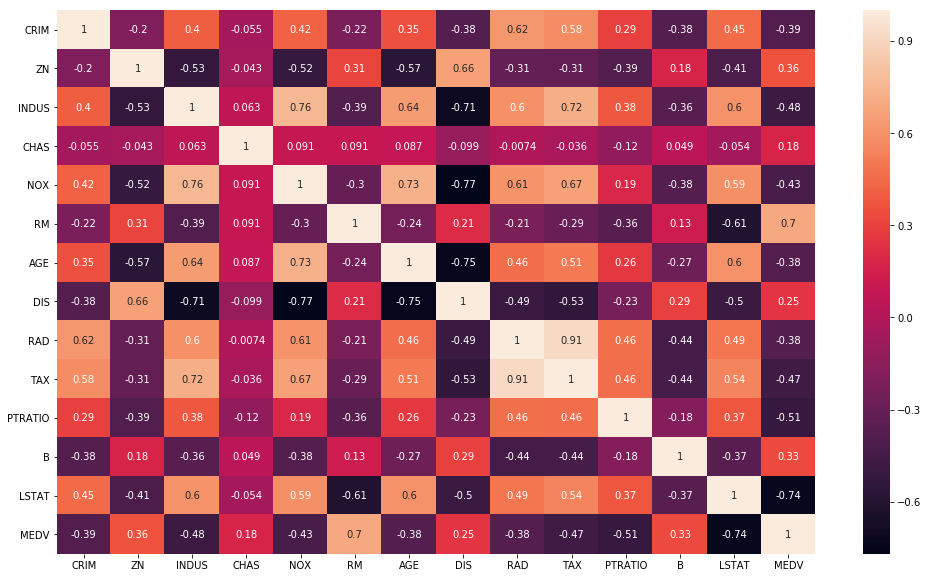

In [13]:
#Using Pearson Correlation
plt.figure(figsize=(17,10))
cor = df.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [14]:
cor["MEDV"]

CRIM      -0.385832
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [15]:
#Correlation with output variable
cor_target = abs(cor["MEDV"])
cor_target

CRIM       0.385832
ZN         0.360445
INDUS      0.483725
CHAS       0.175260
NOX        0.427321
RM         0.695360
AGE        0.376955
DIS        0.249929
RAD        0.381626
TAX        0.468536
PTRATIO    0.507787
B          0.333461
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [127]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

As we can see, only the features RM, PTRATIO and LSTAT are highly correlated with the output variable MEDV. Hence we will drop all other features apart from these. 

If these variables are correlated with each other, then we need to keep only one of them and drop the rest. So let us check the correlation of selected features with each other. This can be done either by visually checking it from the above correlation matrix or from the code snippet below.

In [124]:
print(df[["LSTAT","PTRATIO"]].corr())
print()
print(df[["RM","LSTAT"]].corr())

            LSTAT   PTRATIO
LSTAT    1.000000  0.374044
PTRATIO  0.374044  1.000000

             RM     LSTAT
RM     1.000000 -0.613808
LSTAT -0.613808  1.000000


From the above code, it is seen that the variables RM and LSTAT are highly correlated with each other (-0.613808). Hence we would keep only one variable and drop the other. We will keep LSTAT since its correlation with MEDV is higher than that of RM.

After dropping RM, we are left with two feature, LSTAT and PTRATIO. These are the final features given by Pearson correlation.

# Linear Regression model with the selected features

In [126]:
#Spliting the dataset into a training set and a testing set

from sklearn.cross_validation import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x[["LSTAT","PTRATIO"]],y,test_size=0.2,random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(404, 2)
(404,)
(102, 2)
(102,)


In [19]:
# Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. 

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

In [20]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
y_pred=model.predict(x_test)
y_pred

array([31.76004537, 28.3324873 , 26.48234268,  1.69463779, 27.43912546,
        8.58162011, 25.43860683, 27.59227748, 25.33874783, 18.9840977 ,
       28.46869717, 22.89773341, 24.80049835, 27.37570453, 26.46495207,
       22.0471754 ,  2.03348071, 26.30830574, 14.40604335, 22.58430371,
        6.12294724, 20.56339222, 30.904467  , 24.4701265 , 30.20889849,
       10.9958759 , 26.02813122, 23.74618612, 26.33698903, 28.71207234,
       10.90542851, 10.9599299 , 17.29835418, 16.96798234, 28.58200401,
       19.5976899 , 26.3300876 , 10.48761152, 34.53255282, 31.68541895,
       18.29794079,  0.8342633 , 27.97347576, 15.04504877, 29.78283466,
       32.29941603, -0.17746933, 17.24179109, 25.61367776,  9.51711308,
       18.39708349, 21.01325603, 25.32341893, 12.98612958, 24.18206643,
       29.64021542, 30.68811829, 15.7905032 , 30.73159483, 23.71709795,
       20.17484404, 26.77950294, 15.42145093, 33.66966814, 21.42376671,
       14.40124723, 19.37331859, 27.52634637, 23.94447151, 21.44

In [22]:
print("Accuracy of the model is {:.2f} %" .format(model.score(x_test,y_test)*100))

Accuracy of the model is 55.28 %


# 2. Wrapper Method

A wrapper method needs one machine learning algorithm and uses its performance as evaluation criteria. This means, you feed the features to the selected Machine Learning algorithm and based on the model performance you add/remove the features. This is an iterative and computationally expensive process but it is more accurate than the filter method.

There are different wrapper methods such as Backward Elimination, Forward Selection, Bidirectional Elimination and RFE.

# i. Backward Elimination

As the name suggest, we feed all the possible features to the model at first. We check the performance of the model and then iteratively remove the worst performing features one by one till the overall performance of the model comes in acceptable range.

The performance metric used here to evaluate feature performance is pvalue. If the pvalue is above 0.05 then we remove the feature, else we keep it.

Here we are using OLS model which stands for “Ordinary Least Squares”. This model is used for performing linear regression.

In [23]:
# pvalues for one iteration

#Adding constant column of ones, mandatory for sm.OLS model
x_1 = sm.add_constant(x)
#Fitting sm.OLS model
model = sm.OLS(y,x_1).fit()
model.pvalues

const      3.182440e-12
CRIM       1.126402e-03
ZN         7.836070e-04
INDUS      7.345971e-01
CHAS       1.912339e-03
NOX        4.117296e-06
RM         2.207486e-18
AGE        9.546859e-01
DIS        6.017651e-13
RAD        5.189664e-06
TAX        1.117826e-03
PTRATIO    1.268218e-12
B          5.072875e-04
LSTAT      6.595808e-23
dtype: float64

In [24]:
model.pvalues.idxmax()

'AGE'

In [25]:
max(model.pvalues)

0.9546859016687121

As we can see that the variable ‘AGE’ has highest pvalue of 0.9582293 which is greater than 0.05. Hence we will remove this feature and build the model once again. This is an iterative process and can be performed at once with the help of loop.

In [26]:
#Backward Elimination
cols = list(x.columns)

while len(cols)>0:
    x_1 = sm.add_constant(x[cols])
    model = sm.OLS(y,x_1).fit()
    pmax=max(model.pvalues)
    feature_with_pmax=model.pvalues.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_pmax)
    else:
        break
selected_features_be = cols
print(selected_features_be)

['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


This approach gives the final set of variables which are CRIM, ZN, CHAS, NOX, RM, DIS, RAD, TAX, PTRATIO, B and LSTAT

# Linear Regression model with the selected features

In [27]:
#Spliting the dataset into a training set and a testing set

from sklearn.cross_validation import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x[selected_features_be],y,test_size=0.2,random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(404, 11)
(404,)
(102, 11)
(102,)


In [28]:
# Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. 

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

In [29]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
y_pred=model.predict(x_test)
y_pred

array([37.53777265, 32.15755469, 27.07619184,  5.68066257, 35.11051982,
        5.83916078, 27.52121872, 31.81433681, 26.35511706, 22.77003563,
       31.91992908, 21.51907574, 23.69746997, 33.37772013, 28.5151852 ,
       14.38377113,  0.14838278, 18.65143798, 13.72841159, 14.07887242,
        2.02824674, 19.70502157, 38.17329441, 24.20146848, 31.30857367,
       11.1230464 , 25.04240778, 23.28975307, 22.50233624, 20.50159365,
       15.13798331,  6.9196427 , 18.35275074, 22.35478979, 28.94203658,
       19.01019964, 30.18811281,  8.69316678, 40.85112685, 34.5599446 ,
       20.6983965 ,  2.60040378, 29.98235762, 12.10250097, 27.09117372,
       30.78092062, -6.2596338 , 19.81957077, 20.92647122, 12.43417511,
       20.49530025, 19.20910925, 23.70426521, 12.64042288, 17.12447044,
       25.02554151, 34.81144666, 15.18573246, 28.23419895, 21.08436724,
       20.40180855, 25.82310147, 14.71397983, 33.15608964, 23.18583149,
       13.11469286, 19.20161987, 24.65936896, 21.53866811, 22.02

In [31]:
print("Accuracy of the model is {:.2f} %" .format(model.score(x_test,y_test)*100))

Accuracy of the model is 73.30 %


# ii. RFE (Recursive Feature Elimination)

The Recursive Feature Elimination (RFE) method works by recursively removing attributes and building a model on those attributes that remain. It uses accuracy metric to rank the feature according to their importance. The RFE method takes the model to be used and the number of required features as input. It then gives the ranking of all the variables, 1 being most important. It also gives its support, True being relevant feature and False being irrelevant feature.

In [32]:
model = LinearRegression()

#Initializing RFE model
rfe = RFE(model, 7)

#Transforming data using RFE
x_rfe = rfe.fit_transform(x,y)

temp = pd.Series(rfe.support_, index = x.columns)
selected_features_rfe = temp[temp==True].index

print(rfe.support_)
print()
print(rfe.ranking_)
print()
print(selected_features_rfe)
print()
print(rfe.n_features_)

[False False False  True  True  True False  True  True False  True False
  True]

[2 4 3 1 1 1 7 1 1 5 1 6 1]

Index(['CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'], dtype='object')

7


Here we took LinearRegression model with 7 features and RFE gave feature ranking as above, but the selection of number ‘7’ was random. Now we need to find the optimum number of features, for which the accuracy is the highest. We do that by using loop starting with 1 feature and going up to 13. We then take the one for which the accuracy is highest.

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
model = LinearRegression()
max_score=0
nof=0

for n in range(1, x.shape[1]+1):
    #Initializing RFE model
    rfe = RFE(model, n)
    x_train_rfe = rfe.fit_transform(x_train,y_train)
    x_test_rfe = rfe.transform(x_test)
    
    #Fitting the data to model
    model.fit(x_train_rfe,y_train)
    
    # computing score of the model
    score=model.score(x_test_rfe,y_test)
    if(max_score<score):
        max_score=score
        nof=n 
    
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, max_score))

Optimum number of features: 5
Score with 5 features: 0.774709


In [34]:
cols = list(x.columns)
model = LinearRegression()

#Initializing RFE model
rfe = RFE(model, nof)  

#Transforming data using RFE
X_rfe = rfe.fit_transform(x,y)

#Fitting the data to model
model.fit(X_rfe,y)

temp = pd.Series(rfe.support_, index = cols)
selected_features_rfe = temp[temp==True].index

print(selected_features_rfe)

Index(['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO'], dtype='object')


# Linear Regression model with the selected features

In [35]:
#Spliting the dataset into a training set and a testing set

from sklearn.cross_validation import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x[selected_features_rfe],y,test_size=0.2,random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(404, 5)
(404,)
(102, 5)
(102,)


In [36]:
# Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. 

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

In [37]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
y_pred

array([36.86185944, 27.00615612, 26.73874345, 10.14704133, 37.8946143 ,
       11.8280499 , 24.47146018, 32.51397315, 27.08477879, 21.08397053,
       33.89153464, 18.52092739, 21.33926995, 30.84178748, 26.55677127,
       18.97104974, 10.39833923, 12.76277814, 15.60952768, 17.67523699,
       12.79257211, 18.54016078, 38.60720539, 23.5079831 , 32.85829274,
       13.01376379, 22.72908088, 23.62513504, 18.99229312, 22.26937648,
       19.65305728, 14.88828713, 14.9116316 , 23.10160054, 28.81641706,
       18.30487491, 31.42471161, 15.31283042, 40.59224242, 29.74151079,
       16.83735891, 10.86041097, 27.71500324, 14.01662198, 28.68360973,
       31.581962  ,  6.38446107, 20.1765694 , 17.27634314, 17.99301794,
       21.04853587, 20.01427959, 25.17174038, 18.51403162, 14.66002207,
       23.78009463, 36.44583144, 17.6303012 , 29.4992144 , 23.09677041,
       19.93284306, 24.52820949, 14.77814617, 31.13935146, 17.40851728,
       11.58822228, 20.35228984, 24.10172378, 22.54123884, 17.36

In [38]:
print("Accuracy of the model is {:.2f} %" .format(model.score(x_test,y_test)*100))

Accuracy of the model is 77.47 %


# 3. Embedded Method

Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration. Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.

Here we will do feature selection using Lasso regularization. If the feature is irrelevant, lasso penalizes it’s coefficient and make it 0. Hence the features with coefficient = 0 are removed and the rest are taken.

# i. Lasso regression

In [130]:
reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))

Best alpha using built-in LassoCV: 0.724820
Best score using built-in LassoCV: 0.702390


In [40]:
reg.coef_

array([-0.07391859,  0.04944576, -0.        ,  0.        , -0.        ,
        1.80092396,  0.01135702, -0.81333654,  0.27206588, -0.01542027,
       -0.74314538,  0.00898036, -0.70409988])

In [41]:
coef = pd.Series(reg.coef_, index = x.columns)
coef

CRIM      -0.073919
ZN         0.049446
INDUS     -0.000000
CHAS       0.000000
NOX       -0.000000
RM         1.800924
AGE        0.011357
DIS       -0.813337
RAD        0.272066
TAX       -0.015420
PTRATIO   -0.743145
B          0.008980
LSTAT     -0.704100
dtype: float64

In [42]:
print("Lasso picked " + str(coef[coef!=0].count()) + " variables and eliminated the other " +  str(coef[coef==0].count()) + " variables")

Lasso picked 10 variables and eliminated the other 3 variables


Text(0.5,1,'Feature importance using Lasso Model')

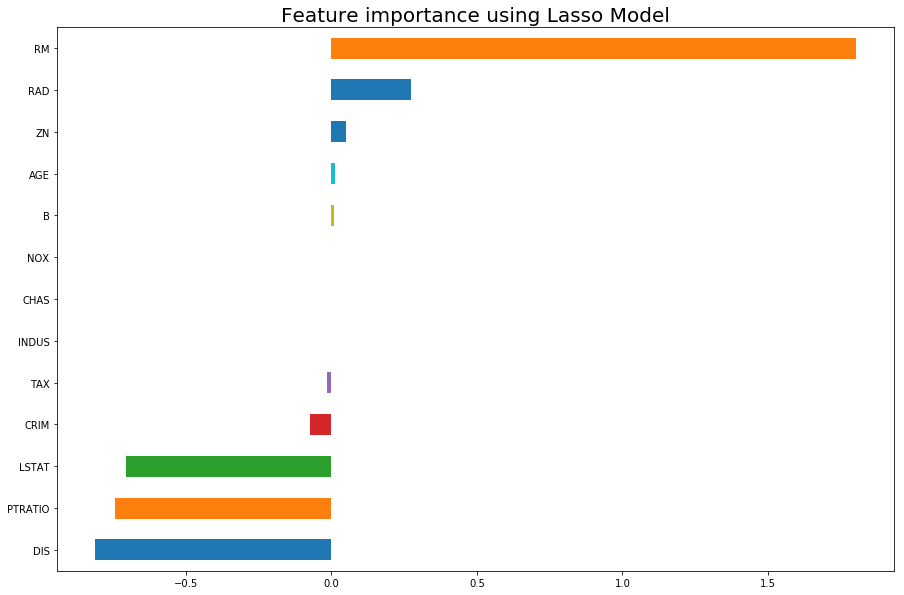

In [43]:
imp_coef = coef.sort_values()
import matplotlib
plt.figure(figsize=(15, 10))
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model", fontsize=20)

Here Lasso model has taken all the features except NOX, CHAS and INDUS.

In [44]:
selected_feature_LS=coef[coef!=0].index
selected_feature_LS

Index(['CRIM', 'ZN', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
       'LSTAT'],
      dtype='object')

# Linear Regression model with the selected features

In [45]:
#Spliting the dataset into a training set and a testing set

from sklearn.cross_validation import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x[selected_feature_LS],y,test_size=0.2,random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(404, 10)
(404,)
(102, 10)
(102,)


In [46]:
# Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. 

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

In [47]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
y_pred

array([37.481578  , 32.41615731, 26.70242786,  4.68104273, 32.73878482,
        5.42528899, 28.59464683, 28.98400325, 25.97338281, 22.08673866,
       31.21922338, 22.5632189 , 23.94032889, 33.82533999, 28.49812177,
       14.24105559, -2.20838595, 22.40251459, 13.75416396, 12.92984194,
        0.30523269, 20.60876998, 38.07804006, 24.66989741, 31.38484929,
       11.94080677, 25.43589929, 22.85125467, 24.26210654, 21.21060564,
       15.33550206,  5.48443315, 18.87918945, 23.46917672, 28.49388538,
       19.8572524 , 27.35992018,  8.32875669, 42.49870719, 35.23149133,
       21.31908956,  2.09032315, 29.68593277, 12.7386914 , 26.57972773,
       30.33282992, -7.06168806, 20.43348454, 24.78421715, 12.59177058,
       19.81356954, 19.63728531, 22.60882957, 12.52032809, 20.75213247,
       25.74100979, 34.48060717, 15.93362469, 27.95518495, 20.96302881,
       20.6592356 , 25.70897319, 15.14947565, 33.35231493, 22.78739775,
       13.4280409 , 19.79003737, 25.03625786, 20.85519267, 21.69

In [48]:
print("Accuracy of the model is {:.2f} %" .format(model.score(x_test,y_test)*100))

Accuracy of the model is 70.03 %


# ii. Ridge regression

It is basically a regularization technique and an embedded feature selection techniques as well.

In [135]:
ridge = Ridge()
ridge.fit(x,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [136]:
ridge.coef_

array([-1.036e-01,  4.741e-02, -8.547e-03,  2.554e+00, -1.079e+01,
        3.849e+00, -5.368e-03, -1.373e+00,  2.896e-01, -1.291e-02,
       -8.766e-01,  9.754e-03, -5.341e-01])

In [137]:
r_coef = pd.Series(ridge.coef_, index = x.columns)
r_coef

CRIM       -0.103622
ZN          0.047414
INDUS      -0.008547
CHAS        2.554221
NOX       -10.793436
RM          3.849256
AGE        -0.005368
DIS        -1.372570
RAD         0.289650
TAX        -0.012907
PTRATIO    -0.876633
B           0.009754
LSTAT      -0.534072
dtype: float64

We can spot all the coefficient terms with the feature variables. It will again help us to choose the most essential features.

Text(0.5,1,'Feature importance using Ridge Model')

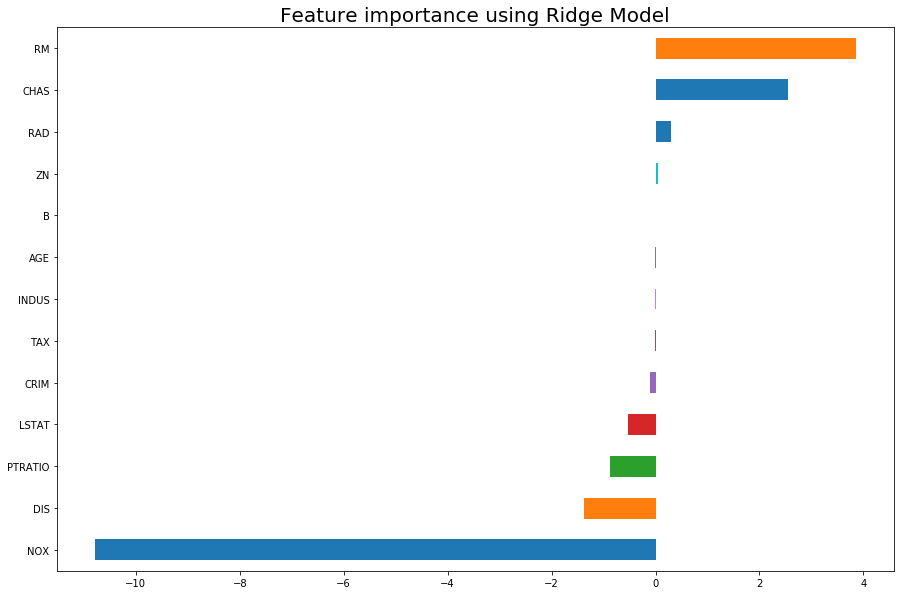

In [138]:
imp_coef = r_coef.sort_values()
plt.figure(figsize=(15, 10))
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model", fontsize=20)

# iii. Tree-based feature selection

Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

In the example below we construct a ExtraTreesRegressor regressor

Use ExtraTreesClassifier classifier for classification problem

Tree-based estimators can be used to compute feature importances, which in turn can be used to discard irrelevant features (when coupled with the sklearn.feature_selection.SelectFromModel meta-transformer)

In [99]:
# Feature Importance with Extra Trees Regressor
from pandas import read_csv
from sklearn.ensemble import ExtraTreesRegressor

# feature extraction
etr = ExtraTreesRegressor()
etr.fit(x, y)
etr_coef=etr.feature_importances_
print(etr_coef)

[0.043 0.002 0.044 0.01  0.036 0.312 0.013 0.029 0.009 0.047 0.084 0.02
 0.351]


In [100]:
etr1_coef = pd.Series(etr_coef, index = x.columns)
etr1_coef

CRIM       0.043491
ZN         0.001828
INDUS      0.043719
CHAS       0.010296
NOX        0.035525
RM         0.312351
AGE        0.012837
DIS        0.028509
RAD        0.009032
TAX        0.046932
PTRATIO    0.084080
B          0.019905
LSTAT      0.351497
dtype: float64

You can see that we are given an importance score for each attribute where the larger score the more important the attribute.

Text(0.5,1,'Feature importance using Ridge Model')

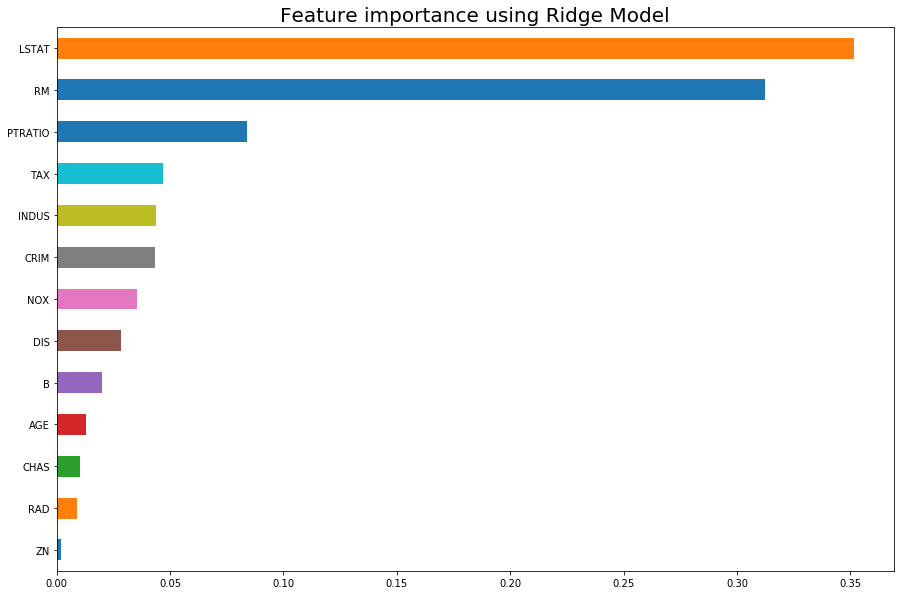

In [102]:
imp_coef = etr1_coef.sort_values()
plt.figure(figsize=(15, 10))
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model", fontsize=20)

In [106]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(etr, prefit=True)
x_n = sfm.transform(x)
x_n.shape

(506, 3)

# Linear Regression model with the selected features

In [107]:
#Spliting the dataset into a training set and a testing set
x_train,x_test,y_train,y_test=train_test_split(x_n,y,test_size=0.2,random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. 
scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)


model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


print("Accuracy of the model is {:.2f} %" .format(model.score(x_test,y_test)*100))

(404, 3)
(404,)
(102, 3)
(102,)
Accuracy of the model is 69.16 %


# 4. Univariate feature selection

Univariate feature selection works by selecting the best features based on univariate statistical tests. 

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

Statistical Test
1. For regression: f_regression, mutual_info_regression
2. For classification: chi2, f_classif, mutual_info_classif

The methods based on F-test estimate the degree of linear dependency between two random variables. On the other hand, mutual information methods can capture any kind of statistical dependency, but being nonparametric, they require more samples for accurate estimation.

The example below uses the f_regression statistical test

In [84]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# feature extraction
skb = SelectKBest(score_func=f_regression, k=13)
fit=skb.fit(x, y)
x_new=skb.fit_transform(x, y)   # or fit.transform(x)
x_new.shape

(506, 13)

# Linear Regression model with the selected features

In [88]:
#Spliting the dataset into a training set and a testing set
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.2,random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. 
scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)


model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


print("Accuracy of the model is {:.2f} %" .format(model.score(x_test,y_test)*100))

(404, 13)
(404,)
(102, 13)
(102,)
Accuracy of the model is 73.30 %
